# Clustering: K-Means

Nous présentons dans ce notebook l'algorithme de **clustering** dit des **K moyennes**( ou **K-Means**). C'est un **algorithme d'apprentissage non supervisé**.

Commençons par importer certaines libraires qui nous seront utiles:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Présentation du K-Means

Le K Means est un algorithme de classification  **non supervisée**: cela signifie que le modèle cherche à comprendre la structure générale des données sans chercher à prédire une variable spécifiquement. 

Le K Means est assez intuitif, il cherche simplement à définir des centres de points proches dans les données. Le **centre** d'un **segment (cluster)**, va être défini comme étant la moyenne des points qui constitue le cluster. Pour attribuer un cluster à un point, on cherche le centre de cluster qui est le plus proche du point.

Réutilisons les données utilisées précédemment mais en supprimant les couleurs car nous ne disposons par de labelisation dans ce cas:

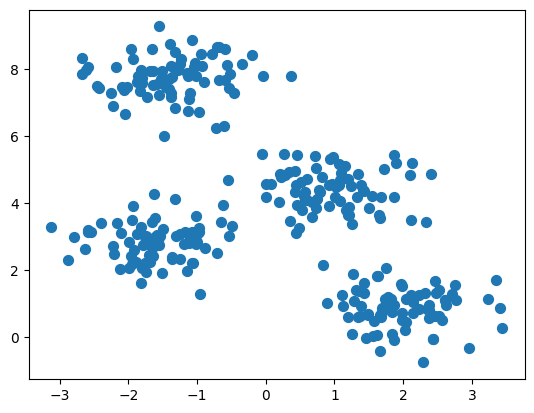

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50);

Par simple observation, on identifie facilement que ces données peuvent être segmentés en quatre sous-ensembles homogènes. Si on cherche à calculer l'ensemble des segmentations de points possibles, on a une quantité exponetielle de distances à évaluer. Cependant, il existe une méthode de *maximisation de vraisemblance* efficace pour déterminer la segmentation optimale de manière plus rapide.

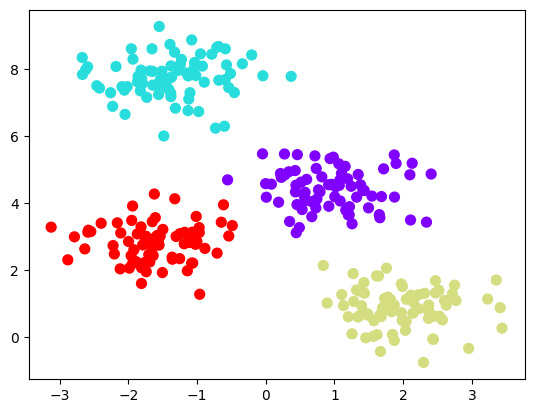

In [7]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

L'algorithme segmente les points en 4 clusters de manière similaire à celle qu'un humain ferait par l'observation.

## L'algorihtme du K Means: maximisation de la vraisemblance

Le K-means utilise une méthode de maximisation de la vraisemblance pour déterminer une segmentation optimale. Cela consiste à:

1. Générer aléatoirement de centres de clusters
    
2. Regroupement des points au centre le plus proche
    
3. Mise à jour des centres aux moyennes des clusters

4. Répéter les étapes 2 et 3 jusqu'à convergence ! On dit qu'il y a convergence qu'il n'y a aucun changement d'attribution de cluster sur l'ensemble des points.

Observons la convergence du K Means:

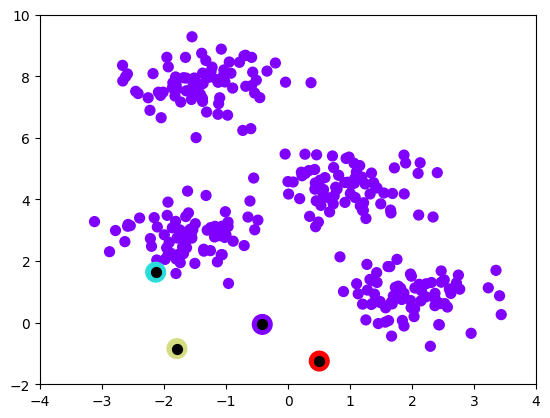

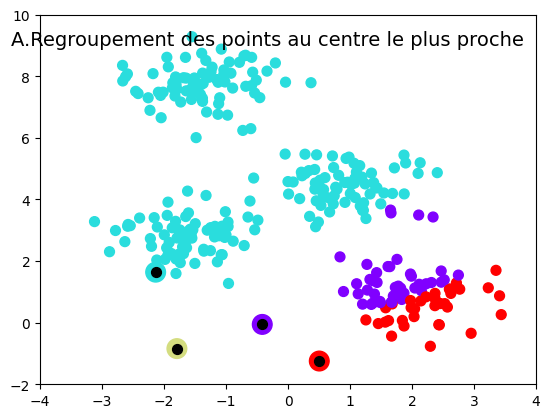

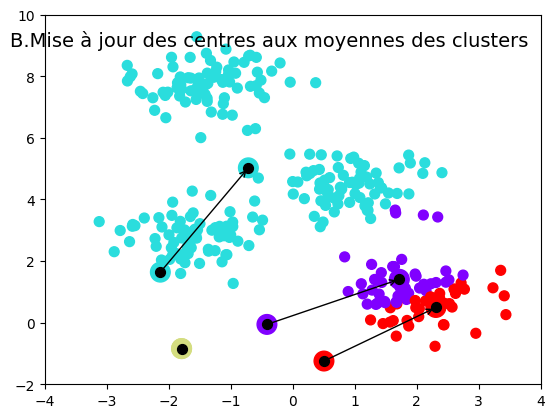

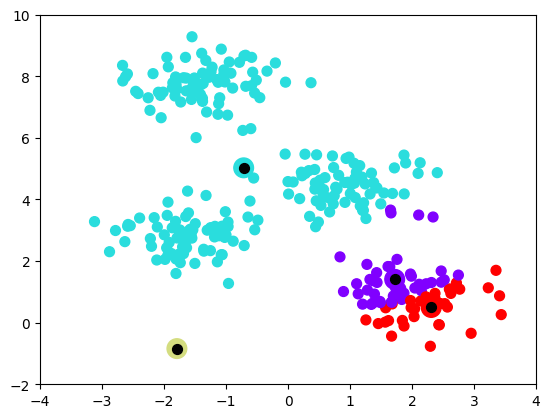

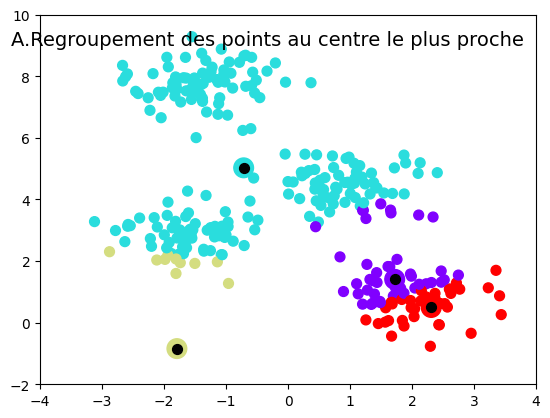

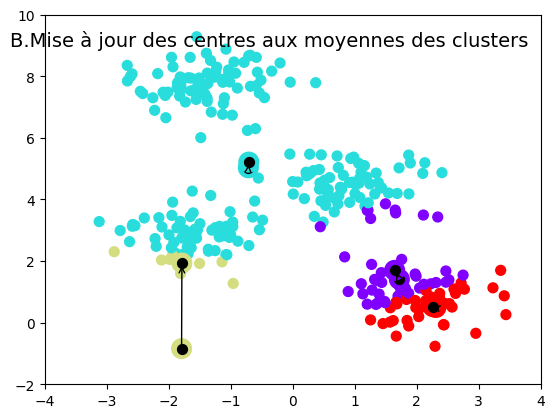

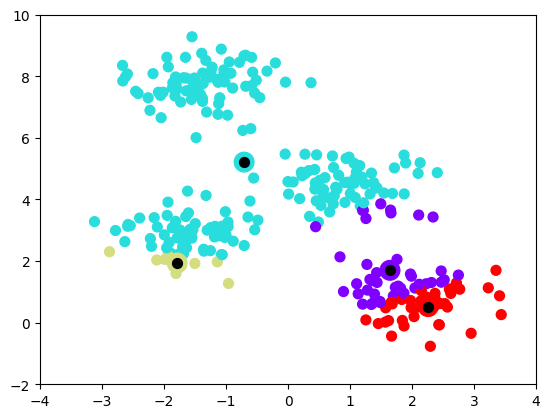

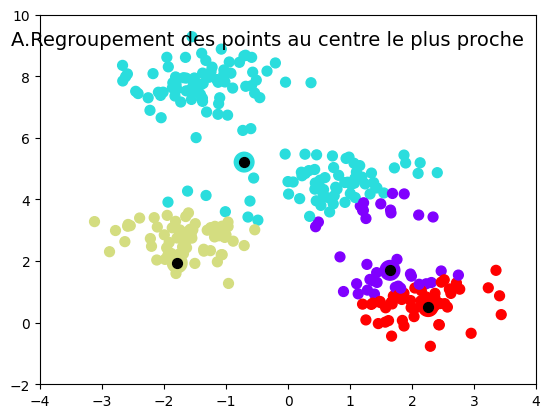

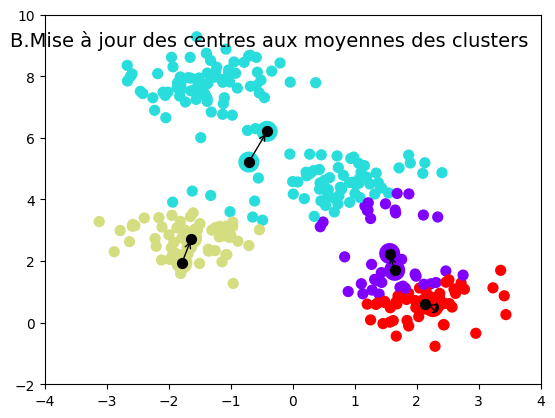

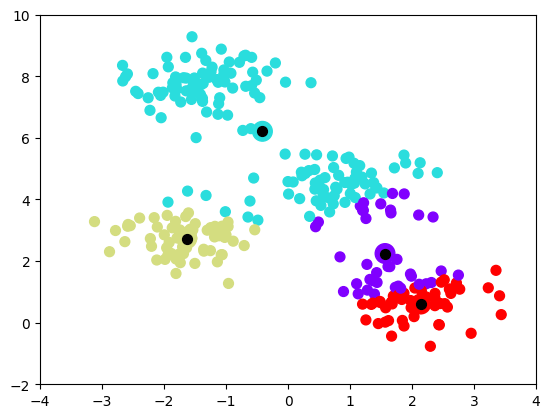

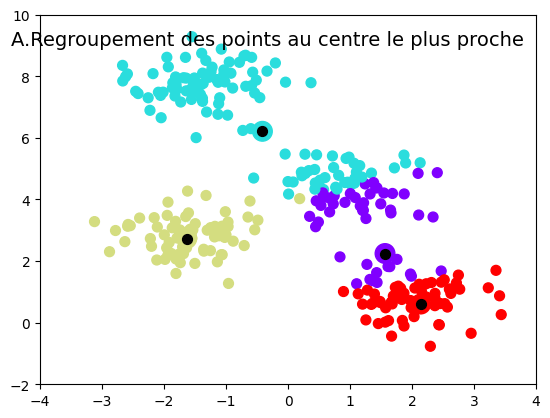

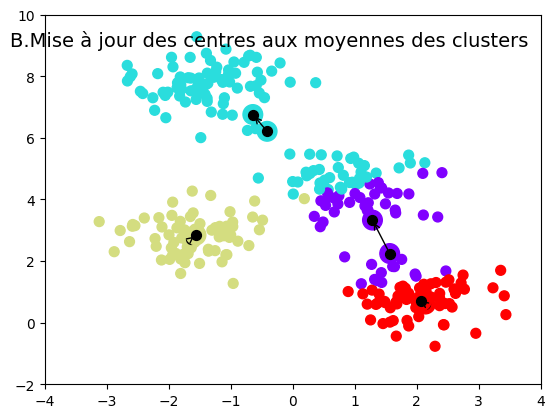

In [8]:
from fig_code import plot_kmeans_interactive
for step in range(12):
    plot_kmeans_interactive(frame_step=step)
    plt.show()

L'algorithme converge (presque) systématiquement vers la solution optimale.

### Limitation du K Means

La converge n'est pas garantie. Pour cette raison, `Scikit-Learn` utilise par défaut de multiples valuers d'initialisations des centre and conserve uniquement la meilleure solution.

De plus, le nombre de cluster $K$ doit être fixé à priori donc cette estimation peut être difficile quand on travaille en grande dimension. Heureusement, certaines méthodes permettent de déterminer le nombre optimal de clusters en fonction de nos données.


## Exemple: clustering de chiffres manuscrits par le K Means

On s'intéresse à nouveaux aux données de chiffres manuscrits pour donner un exemple conret. Ici, nous utilisons le K Means pour regrouper automatiquement toutes les images qui représente un même chiffre. On va s'intéresser aux valeurs des centres obtenus par le K Means.

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
digits.data.shape

(1797, 64)

In [18]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

Nous obtenons 10 clusters de vecteurs en dimensions 64. Visualisons ces 10 centres de clusters pour comprendre ce qu'ils contiennent.

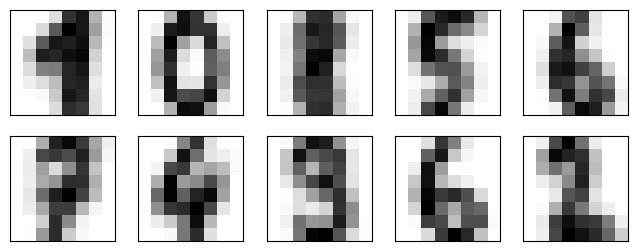

In [19]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

**Sans disposer d'annotations à priori**, le K Means est en mesure de déterminer des cluters dont le centre correspondent visualement aux chiffres de 0 à 9 (sauf le 8!).

Les clusters ne sont par contre pas dans le bon ordre, on se propose de corriger cela:

In [20]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Pour vérifier la pertinence de notre clustering, évaluons la performance de l'algorithme en classification:

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7217584863661658

80% est un score honorable! La matrice de confusion nous permet d'évaluer avec plus de détails ces performances:

[[176   0   0   0   1   0   1   0   0   0]
 [  0 154  19   0   0   1   8   0   0   0]
 [  1  10 151  12   0   0   0   3   0   0]
 [  0   7   1 163   0   2   0  10   0   0]
 [  0  12   0   0 163   0   0   6   0   0]
 [  0   0   0  39   1 140   2   0   0   0]
 [  1   1   0   0   0   0 179   0   0   0]
 [  0   8   0   0   0   0   0 171   0   0]
 [  1 105   4  46   0   5   6   7   0   0]
 [  0  22   0 145   0   6   0   7   0   0]]


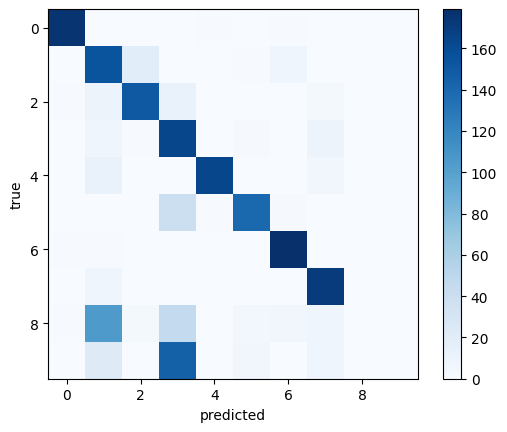

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Pour rappel, ce score de 80% en accuracy est obtenu **sans aucune supervision** de l'algorihtme, c'est à dire **aucune annotation préalable des données**.

## Autre exemple: KMeans pour la compression de couleurs


La compression de couleur consitute une application intéressante du clustering. Imaginons que l'on dispose d'une image avec potentiellment des millions de couleurs. Une majorité de ces couleurs va certainement être inutilisée par une image donnée. Et réciproquement, une même couleur peut être potentiellement utilisés par de nombreux pixels de l'image.

`Scikit-Learn` propose des images à manipuler dans le module `datasets`:

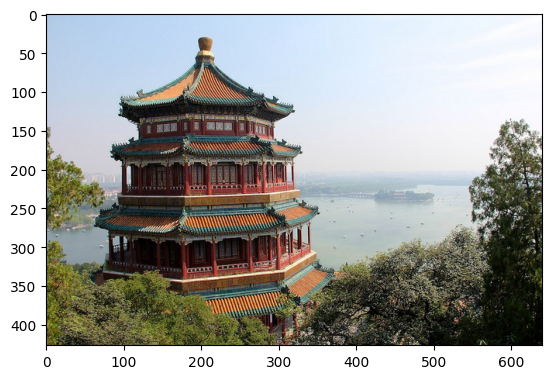

In [23]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

Cette image est stockée dans un array à 3 dimensions, de taille ``(height, width, RGB)``:


In [24]:
china.shape

(427, 640, 3)

Cette image peut-être vue comme un nuage de points dans une espace de couleurs à 3 dimensions. On normalise les couleurs pour qu'elle soit comprise entre 0 et 1 :


In [25]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


On dipose de 273 280 points dans un espace de 3 dimensions.

La tâche est de compresser ces $256^3$ couleurs dans un nombre significativement plus petit, à savoir 64 couleurs. Concrètement, on cherche à obtenir 64 clusters dans nos données et recréer par la suite une image similaire en replacant chaque couleur (ou point) par le centre de son cluster le plus proche.

Dans ce cas, on utilise le module ``MiniBatchKMeans``, une version plus sophistiquée qui permet de traiter des volumes de données plus important dans un délais raccourci:

In [26]:
from sklearn.cluster import MiniBatchKMeans

Text(0.5, 1.0, '64 colors')

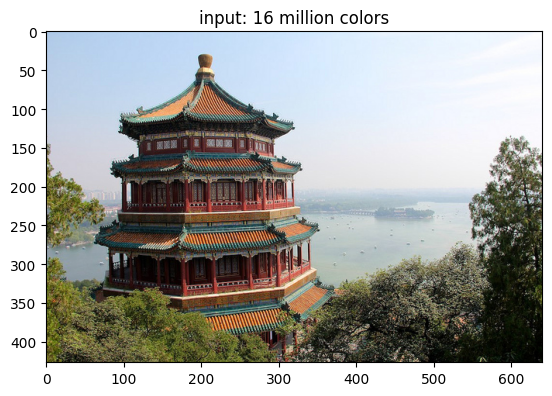

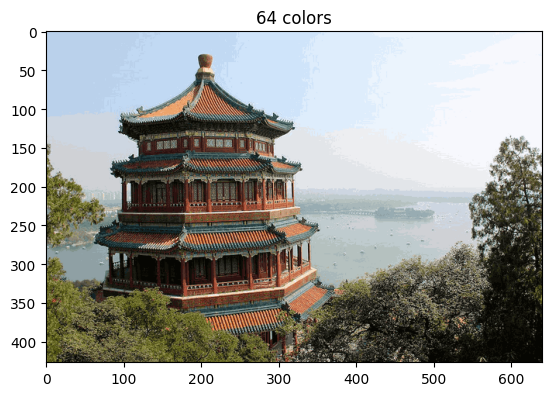

In [27]:
# on peut réduire la taille de l'image pour accélerer la convergence
n_colors = 64

X = (china / 255.0).reshape(-1, 3)
    
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)

# La nouvelle image est créee puis affichée
#with plt.style.context('seaborn-white'):
plt.figure()
plt.imshow(china)
plt.title('input: 16 million colors')

plt.figure()
plt.imshow(new_image)
plt.title('{0} colors'.format(n_colors))

On compare l'image d'origine avec l'image compressée. On a reduit le nombre de couleur, initialement égal à $256^3$, à uniquement 64 couleurs. Le résultat reste très satisfaisant !
